In [1]:
from torch_kmeans import KMeans
import torch
import numpy as np
from normals_init import find_neighs
import ckwrap

all_pts = np.load("xyz_points.npy")
vis_pts = all_pts[0]
d_ori, ind_ori = find_neighs(vis_pts)
vis_pts = vis_pts[ind_ori][0]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [10]:
vis_pts = vis_pts[np.newaxis,:,:] # shape: 1, 250, 3
vis_pts = torch.from_numpy(vis_pts)
model = KMeans(clusters= 5)
res = model(vis_pts)
print(res.labels)

Full batch converged at iteration 23/100 with center shifts = tensor([0.], dtype=torch.float64).
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
         5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 2, 5, 5, 3, 6, 2, 5, 1, 2, 3,
         1, 6, 3, 0, 2, 5, 5, 1, 2, 2, 2, 4, 7, 5, 3, 1, 6, 7, 1, 6, 3, 2, 3, 3,
         5, 2, 3, 6, 4, 2, 2, 1, 3, 5, 3, 6, 5, 5, 3, 6, 6, 5, 5, 4, 7, 3, 6, 2,
         7, 3, 1, 3, 2, 5, 5, 4, 7, 3, 4, 3, 2, 5, 4, 6, 3, 5, 3, 1, 5, 7, 4, 6,
         7, 3, 1, 6, 3, 5, 7, 3, 6, 2, 5, 2, 5, 5, 4, 7, 1, 2, 2, 7, 7, 7, 4, 2,
         5, 3, 3, 1, 2, 2, 6, 1, 5, 1, 7, 5, 5, 5, 4, 7, 6, 5, 7, 1, 2, 5, 3, 5,
         1, 2, 1, 4, 4, 3, 6, 3, 2, 7, 6, 1, 5, 6, 7, 3, 2, 7, 1, 4, 4, 2, 1, 3,
         1, 7, 7, 6, 4, 5, 7, 7, 7, 6, 3, 5, 2, 7, 1, 4, 1, 7, 2, 4, 6, 7, 6, 7,
         4, 4, 5, 1, 4, 3, 6, 1, 1, 3, 7, 6, 3, 7, 3, 4, 1, 7, 4, 4, 4, 2, 2, 7,
         6, 4, 6, 3, 6, 4, 2, 3, 4, 1]])


/home/cvig_5/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/torch_kmeans/clustering/kmeans.py:544: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/c10/cuda/CUDAFunctions.cpp:109.)
  centers = group_by_label_mean(x, c_assign, k_max_range)


In [11]:
lists = [[] for i in range(5)]
for i in range(5):
    lists[i].append(vis_pts[res.labels == i].numpy())
print(lists[0][0].shape)

(35, 3)


In [18]:
print(lists[1][0].shape)

(27, 3)


In [19]:
#visualising the clusters

import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
colors = ['blue', 'red', 'green', 'purple', 'orange']  
for i in range(5):
    ax.scatter(lists[i][0][:,0], lists[i][0][:,1], c = colors[i], s = 10)
# for i, bucket in enumerate(dists_arrays):
#     ax.plot(bucket[0], [i] * len(bucket[0]), '.', color=colors[i], markersize=10)

plt.xlabel("Data Values")
plt.ylabel("Cluster Labels")
plt.title("Clustered Data")
plt.grid(True) 
plt.show()


<Figure size 640x480 with 0 Axes>

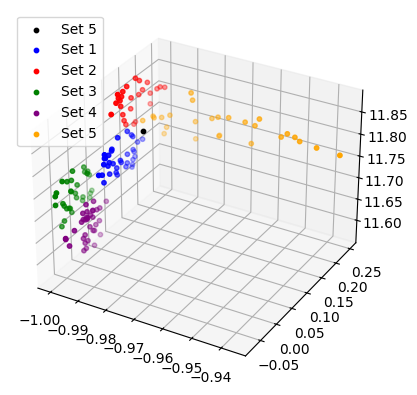

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'purple', 'orange']
ax.scatter(lists[i][0][0, 0], lists[i][0][0, 1], lists[i][0][0, 2], c='black', s=10, label=f'Set {i + 1}')
for i in range(5):
    x = lists[i][0][:, 0]
    y = lists[i][0][:, 1]
    z = lists[i][0][:, 2]
    
    ax.scatter(x[1:], y[1:], z[1:], c=colors[i], s=10, label=f'Set {i + 1}')
ax.legend()

plt.show()


In [27]:
labels_per_row = np.apply_along_axis(lambda row: ckwrap.ckmeans(row, 5).labels, 1, d_ori)
labels_per_row.shape

(100000, 250)

In [32]:
labels_per_row[0].shape

(250,)

In [33]:
labels = labels_per_row[0]
lists = [[] for i in range(5)]
for i in range(5):
    lists[i].append(vis_pts[np.where(labels == i)])
print(lists[0][0].shape)

(24, 3)


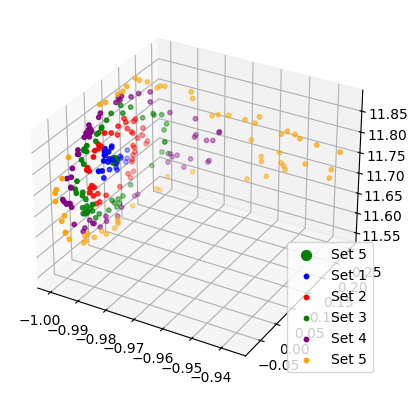

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'purple', 'orange']
ax.scatter(all_pts[0][0][0], all_pts[0][0][1], all_pts[0][0][2], c='green', s=50, label=f'Set {i + 1}')
for i in range(5):
    x = lists[i][0][:, 0]
    y = lists[i][0][:, 1]
    z = lists[i][0][:, 2]
    
    ax.scatter(x[1:], y[1:], z[1:], c=colors[i], s=10, label=f'Set {i + 1}')
ax.legend()

plt.show()
